# SIR with sinusoidal births
This is the PYTHON version of program 5.3 from page 184 of "Modeling Infectious Disease in humans and animals"by Keeling & Rohani. This is based on code written by Ilias Soumpasis.

In [10]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#parameters (in units of days)
beta=17/13.  #transimission rate
alpha0=1/(50*365.0) #birth rate
alpha1=([0.25]) # amplitude of birth rate fluctuations: setting alpha1 too high can cause numerical difficulties

#initial conditions
S0=1/17. #initial susceptible fraction
I0=1e-4 #initial infected fraction

ND=MaxTime=60*365 #number of days
TS=1.0 #time step


### This code can also be used to generate bifurcation diagrams, by setting
### beta1 equal to a vector of seasonality rates. The bifurcation diagram is
### constructed using extrapolated initial conditions. Try:
(beta,gamma,alpha0, alpha1,S0,I0,ND)=(17/13.,1/13., 1./(50*365), np.arange(0.00,1.0,0.01),1/17., 1e-4, 60*365)

INPUT=np.array((S0,I0, 1-S0-I0))

In [12]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP   
	t=np.mod(t,365.)
	alpha=alpha0*(1+alpha1*np.sin(2*np.pi*t/365))
	mu=alpha0
	Y[0] = alpha - beta*V[0]*V[1] - mu*V[0]
	Y[1] = beta*V[0]*V[1] - mu*V[1] - gamma*V[1]
	Y[2] = gamma * V[1] - mu * V[2]
	return Y   # For odeint

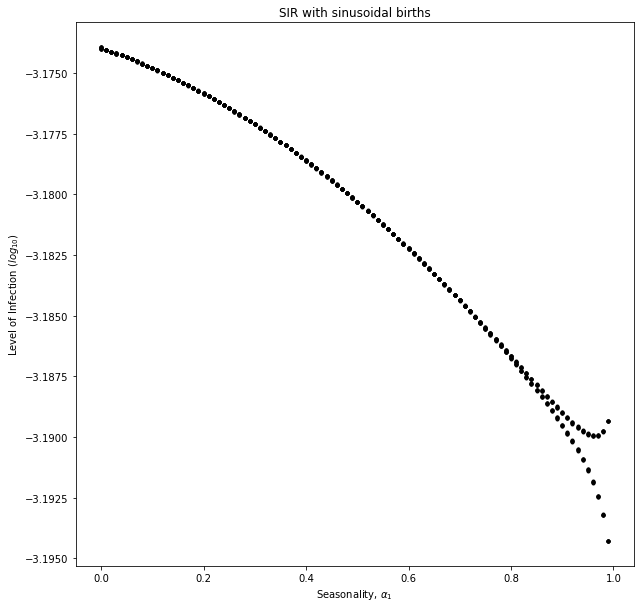

In [52]:
fig=plt.figure(figsize=(10,10))


if len(alpha1)==1:
	alpha1=alpha1[0]
	t_start = 0.0; t_end = ND; t_inc = TS
	t_range = np.arange(t_start, t_end+t_inc, t_inc)
	RES = spi.odeint(diff_eqs,INPUT,t_range)

	

	t=(np.arange(ND)/365.)
	#Ploting
	plt.axis('off')   
	plt.title('SIR with sinusoidal births')
	fig.add_subplot(311)
	plt.plot(t,RES[1:,0], 'g', label='S')
	plt.xlabel ('Time (years)')
	plt.ylabel ('Susceptibles')
	fig.add_subplot(312)
	plt.plot(t,RES[1:,1], 'r', label='I')
	plt.xlabel ('Time (years)')
	plt.ylabel ('Infectious')
	fig.add_subplot(313)
	plt.plot(t,1-(RES[1:,0]+RES[1:,1]), 'k', label='R')
	plt.xlabel ('Time (years)')
	plt.ylabel ('Recovereds')
	plt.savefig('SIR_sinusoidal_births.pdf')    


else:
	if ND < 3650:
		ND = 3650
	alpha2=alpha1
	Bifur_I=np.zeros((len(alpha2),10))
	for i in range(len(alpha2)):
		alpha1 = alpha2[i]

		t_start = 0.0; t_end = ND; t_inc = TS
		t_range = np.arange(t_start, t_end+t_inc, t_inc)
		RES = spi.odeint(diff_eqs,INPUT,t_range)
		INPUT=RES[-1]

		for j in range(10):
			Bifur_I[i,j]=RES[np.arange(ND)[(int(ND-j*365.)-1)],1]

	### Plotting
	plt.plot (alpha2,np.log10(Bifur_I), '.k')
	plt.xlabel (r'Seasonality, $\alpha_1$')
	plt.ylabel (r'Level of Infection $(log_{10})$')
	plt.title('SIR with sinusoidal births')
	plt.savefig('SIR_sinusoidal_births_bifurcation_diagram.pdf')    

plt.show()